In [2]:
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')
df_test.head(10)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
5,3116950,4.43,x,h,n,f,x,c,n,5.36,...,NaN,s,n,NaN,NaN,t,r,NaN,d,a
6,3116951,2.92,x,d,n,f,p,NaN,e,4.83,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
7,3116952,2.59,o,NaN,k,f,f,f,f,2.73,...,NaN,g,g,NaN,NaN,f,f,NaN,d,a
8,3116953,4.13,x,t,o,f,a,c,n,5.36,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
9,3116954,11.91,f,e,b,f,NaN,c,b,5.32,...,NaN,NaN,w,NaN,NaN,t,f,NaN,d,a


In [4]:
print(df_train.shape)
print(df_test.shape)

(3116945, 22)
(2077964, 21)


In [5]:
print("Null values in each column in train data:\n", df_train.isnull().sum())
print("Null values in each column in test data:\n",df_test.isnull().sum())

Null values in each column in train data:
 id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64
Null values in each column in test data:
 id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-a

In [6]:
df_train.describe(include='number').T
df_test.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
id,2077964.0,4.155926e+06,599856.681721,3116945.0,3636435.75,4155926.50,4675417.25,5194908.00
cap-diameter,2077957.0,6.306192e+00,4.685462,0.0,3.31,5.74,8.23,607.00
stem-height,2077963.0,6.346509e+00,2.698978,0.0,4.67,5.88,7.41,57.29
stem-width,2077964.0,1.114837e+01,8.100181,0.0,4.97,9.64,15.62,102.91


In [7]:
df_train.describe(include='O').T

,count,unique,top,freq
class,3116945,2,p,1705396
cap-shape,3116905,74,x,1436026
cap-surface,2445922,83,t,460777
cap-color,3116933,78,n,1359542
does-bruise-or-bleed,3116937,26,f,2569743
gill-attachment,2593009,78,a,646034
gill-spacing,1858510,48,c,1331054
gill-color,3116888,63,w,931538
stem-root,359922,38,b,165801
stem-surface,1136084,60,s,327610


In [8]:
numerical_columns = df_train.select_dtypes(include='number').columns

print(numerical_columns)

#TEST
numerical_columns_t = df_test.select_dtypes(include='number').columns

print(numerical_columns_t)

Index(['id', 'cap-diameter', 'stem-height', 'stem-width'], dtype='object')
Index(['id', 'cap-diameter', 'stem-height', 'stem-width'], dtype='object')


In [9]:
missing_train = df_train.isnull().mean() * 100
missing_test = df_test.isnull().mean() * 100

print("Columns in df_train with more than 65% missing values:")
print(missing_train[missing_train > 65])

print("Columns in df_test with more than 65% missing values:")
print(missing_test[missing_test > 65])

Columns in df_train with more than 65% missing values:
stem-root            88.452732
veil-type            94.884350
veil-color           87.936970
spore-print-color    91.425482
dtype: float64
Columns in df_test with more than 65% missing values:
stem-root            88.452543
veil-type            94.878689
veil-color           87.880445
spore-print-color    91.417224
dtype: float64


In [10]:
X_train = df_train.drop(columns=['id', 'stem-root', 'veil-type', 'veil-color','spore-print-color','stem-surface','class'])
y_train = df_train['class']
df_test = df_test.drop(columns=['id', 'stem-root', 'veil-type', 'veil-color','spore-print-color','stem-surface'])

In [11]:
df_test

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,w,t,g,d,a
1,6.90,o,t,o,f,NaN,c,y,1.27,10.75,n,f,f,d,a
2,2.00,b,g,n,f,NaN,c,n,6.18,3.14,n,f,f,d,s
3,3.47,x,t,n,f,s,c,n,4.98,8.51,w,t,z,d,u
4,6.17,x,h,y,f,p,NaN,y,6.73,13.70,y,t,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,0.88,x,g,w,f,a,d,w,2.67,1.35,e,f,f,d,u
2077960,3.12,x,s,w,f,d,c,w,2.69,7.38,w,f,f,g,a
2077961,5.73,x,e,e,f,a,NaN,w,6.16,9.74,y,t,z,d,a
2077962,5.03,b,g,n,f,a,d,g,6.00,3.46,g,f,f,d,a


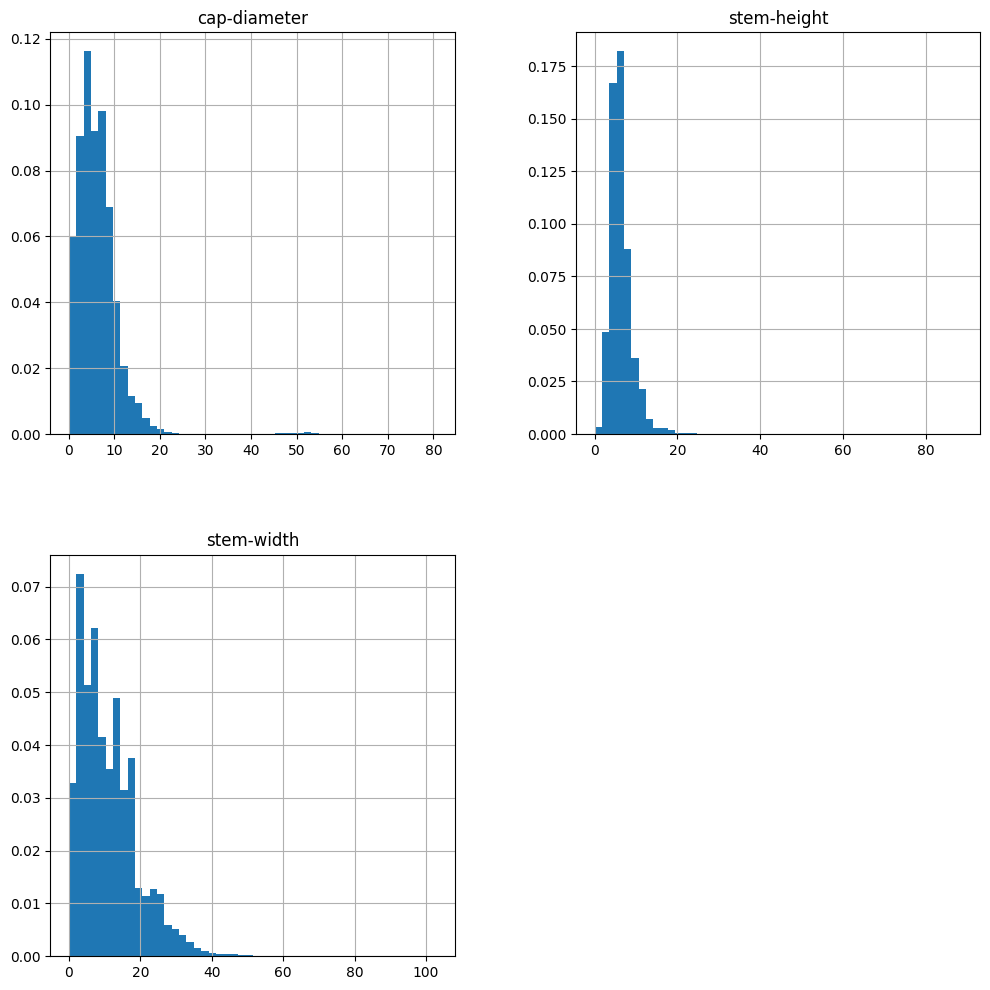

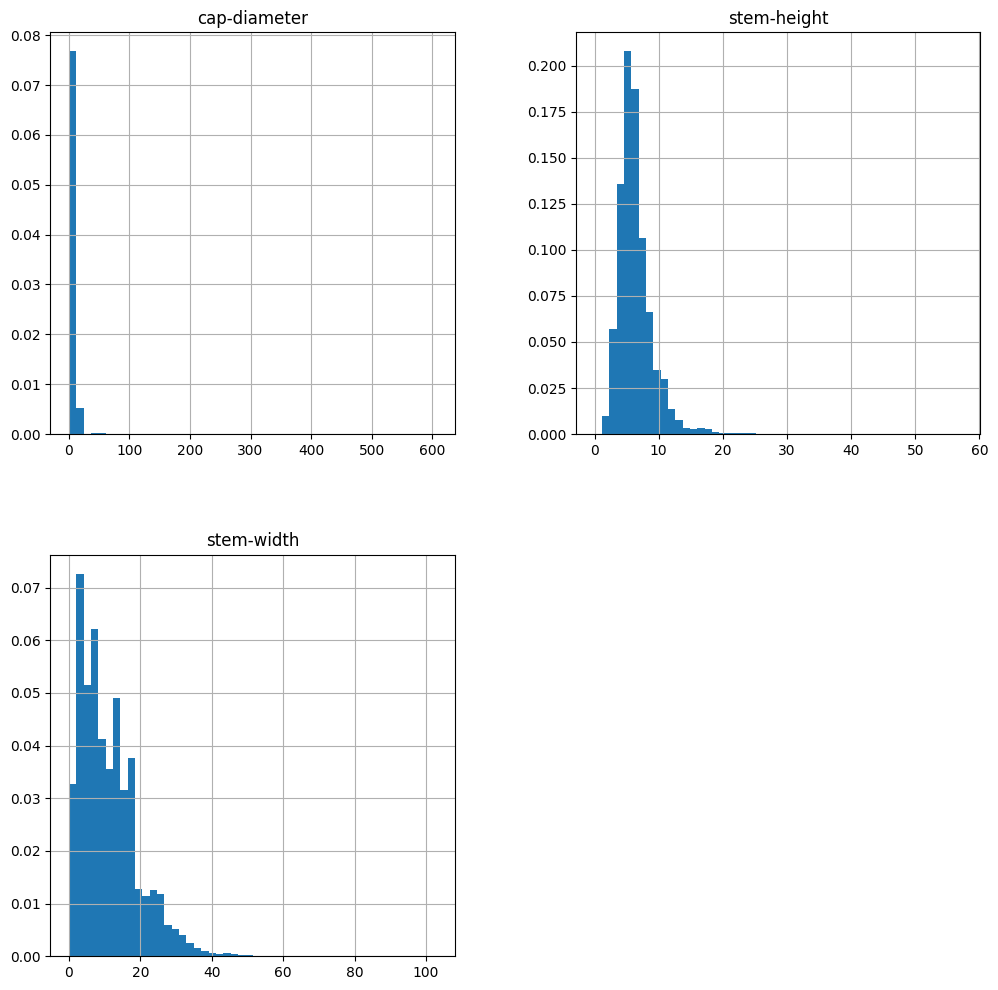

In [12]:
import matplotlib.pyplot as plt
X_train.hist(bins=50, density=True, figsize=(12, 12))
plt.show()
#TEST
import matplotlib.pyplot as plt
df_test.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

In [13]:
from scipy.stats import skew
skewness = skew(X_train['cap-diameter'].dropna())
print('Skewness of train data cap-diameter:', skewness)


skewness1 = skew(df_test['cap-diameter'].dropna())
print('Skewness of test data cap-diameter:', skewness1)

Skewness of train data cap-diameter: 3.97260725834219
Skewness of test data cap-diameter: 4.957157093423875


 ****FILL MISSING VALUES OF cap-diameter COLUMN USING IMPUTER-MEDIAN BECAUES IT'S HIGLY SKEWED****

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer1 = SimpleImputer(strategy='mean')

X_train['cap-diameter'] = imputer.fit_transform(X_train[['cap-diameter']])

df_test['cap-diameter'] = imputer.fit_transform(df_test[['cap-diameter']])
df_test['stem-height'] = imputer1.fit_transform(df_test[['stem-height']])


In [15]:
#FILL THE COUMNS WITH THEIR MOST FREQUENT VALUE
fill_values = {
    'cap-shape': 'x',
    'cap-color': 'n',
    'does-bruise-or-bleed': 'f',
    'gill-color': 'w',
    'stem-color': 'w',
    'has-ring': 'f',
    'ring-type': 'f',
    'habitat': 'd'
}

X_train = X_train.fillna(value=fill_values)
df_test = df_test.fillna(value=fill_values)

In [16]:
#FILL THE MISSING VALUES WITH THE WORD 'Missing' CAUSE THESE HAVE TOO MUCH MISSING VALUES
columns_to_fill = ['cap-surface', 'gill-attachment', 'gill-spacing']

X_train[columns_to_fill] = X_train[columns_to_fill].fillna('Missing')
df_test[columns_to_fill] = df_test[columns_to_fill].fillna('Missing')

In [17]:
threshold = 1000

for col in X_train.select_dtypes(include=['object']).columns:
    value_counts = X_train[col].value_counts()

    rare_values = value_counts[value_counts < threshold].index

    X_train[col] = X_train[col].replace(rare_values, 'Missing')
    
    
for col in df_test.select_dtypes(include=['object']).columns:
    value_counts = df_test[col].value_counts()

    rare_values = value_counts[value_counts < threshold].index

    df_test[col] = df_test[col].replace(rare_values, 'Missing')

In [18]:
X_train.isnull().mean()*100
df_test.isnull().mean()*100

cap-diameter            0.0
cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-spacing            0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
dtype: float64

In [19]:
# from sklearn.feature_selection import SelectKBest, f_classif

# # Apply SelectKBest with ANOVA F-value as the score function
# selector = SelectKBest(score_func=f_classif, k='all')  # You can specify a number instead of 'all'
# X_train = selector.fit_transform(X_train, y_train)

# # Get the scores of each feature
# scores = selector.scores_

# # Print the scores
# print("Feature scores:", scores)

In [20]:
#ENCODING CATEGORICAL DATA

In [21]:
#LABEL ENCODING THE TARGET COLUMN
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_train

array([0, 1, 0, ..., 1, 0, 1])

In [22]:
#TRAIN
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
oe = OrdinalEncoder()

# Apply ordinal encoding to the categorical columns
#this is a numpy array,not a df
X_train_encoded = oe.fit_transform(X_train[['cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
        'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']])

encoded_df = pd.DataFrame(X_train_encoded, columns=oe.get_feature_names_out())

X_train_combined = pd.concat([
    X_train[['cap-diameter', 'stem-height', 'stem-width']].reset_index(drop=True),
    encoded_df.reset_index(drop=True)
], axis=1)

In [23]:
#TEST
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
oe = OrdinalEncoder()

# Apply ordinal encoding to the categorical columns
#this is a numpy array,not a df
df_test_encoded = oe.fit_transform(df_test[['cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
        'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']])

encoded_df_t = pd.DataFrame(df_test_encoded, columns=oe.get_feature_names_out())

df_test_combined = pd.concat([
    df_test[['cap-diameter', 'stem-height', 'stem-width']].reset_index(drop=True),
    encoded_df_t.reset_index(drop=True)
], axis=1)

In [24]:
unique_values = df_test['cap-color'].unique()
print(unique_values)

['n' 'o' 'y' 'k' 'b' 'w' 'e' 'g' 'p' 'u' 'l' 'r' 'Missing']


In [25]:
#ONE HOT ENCODING THE CATEGORICAL DATA
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(drop='first',sparse_output=True)

# X_train_new = ohe.fit_transform(X_train[['cap-shape', 'cap-surface', 'cap-color',
#        'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
#         'stem-color', 'has-ring', 'ring-type',
#        'habitat', 'season']])
# X_train_new.shape

In [26]:
# encoded_df = pd.DataFrame(X_train_new, columns=ohe.get_feature_names_out())

# # Combine numerical features and encoded features
# X_train_combined = pd.concat([
#     X_train[['cap-diameter', 'stem-height', 'stem-width']].reset_index(drop=True),
#     encoded_df.reset_index(drop=True)
# ], axis=1)

In [27]:
# np.hstack((X_train[['cap-diameter','stem-height', 'stem-width']].values,X_train_new)).shape

In [28]:
column_names = list(df_test_combined.columns)
print(column_names)

['cap-diameter', 'stem-height', 'stem-width', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


In [29]:
X_train = X_train_combined
X_train.head()

df_test = df_test_combined
df_test.head()


,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
0,8.64,11.13,17.12,7.0,0.0,6.0,2.0,0.0,0.0,11.0,11.0,2.0,3.0,1.0,0.0
1,6.90,1.27,10.75,4.0,9.0,7.0,1.0,0.0,1.0,12.0,6.0,1.0,2.0,1.0,0.0
2,2.00,6.18,3.14,1.0,3.0,6.0,1.0,0.0,1.0,6.0,6.0,1.0,2.0,1.0,1.0
3,3.47,4.98,8.51,7.0,9.0,6.0,1.0,6.0,1.0,6.0,11.0,2.0,8.0,1.0,2.0
4,6.17,6.73,13.70,7.0,4.0,12.0,1.0,5.0,0.0,12.0,12.0,2.0,2.0,1.0,2.0


In [30]:
#TRAIN
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')  # can specify a number instead of 'all'
X_new = selector.fit_transform(X_train, y_train)

# Get the scores of each feature
scores = selector.scores_

# Get the feature names
feature_names = X_train.columns

# Create a df to store feature names and scores
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score': scores
})

# Sort the df by score in ascending order
sorted_feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print the sorted feature scores
print("Feature scores in ascending order:")
print(sorted_feature_scores)

Feature scores in ascending order:
                 Feature         Score
2             stem-width  92543.628283
0           cap-diameter  84674.159338
7        gill-attachment  39196.446424
3              cap-shape  34989.985003
12             ring-type  25074.833105
8           gill-spacing  19176.381227
10            stem-color  18638.088248
9             gill-color  14752.650309
14                season  12640.779565
1            stem-height   7730.791302
11              has-ring   7694.151692
5              cap-color   7683.155301
6   does-bruise-or-bleed   4399.694194
13               habitat   1671.829189
4            cap-surface      2.517062


In [31]:
X_train = X_train.drop(columns=['stem-height', 'has-ring', 'cap-color', 'does-bruise-or-bleed','habitat','cap-surface'])

In [32]:
df_test = df_test.drop(columns=['stem-height', 'has-ring', 'cap-color', 'does-bruise-or-bleed','habitat','cap-surface'])

In [33]:
df_test.head()

,cap-diameter,stem-width,cap-shape,gill-attachment,gill-spacing,gill-color,stem-color,ring-type,season
0,8.64,17.12,7.0,0.0,0.0,11.0,11.0,3.0,0.0
1,6.90,10.75,4.0,0.0,1.0,12.0,6.0,2.0,0.0
2,2.00,3.14,1.0,0.0,1.0,6.0,6.0,2.0,1.0
3,3.47,8.51,7.0,6.0,1.0,6.0,11.0,8.0,2.0
4,6.17,13.70,7.0,5.0,0.0,12.0,12.0,2.0,2.0


In [34]:
X_train = X_train.astype('float32')
df_test = df_test.astype('float32')

In [35]:
#TRAIN
skewed_columns = ['cap-diameter', 'stem-width']

for col in skewed_columns:
    X_train[f'{col}_sqrt'] = np.sqrt(X_train[col])
    X_train[f'{col}_log'] = np.log1p(X_train[col])

skewness_before = X_train[skewed_columns].apply(skew)
skewness_after_sqrt = X_train[[f'{col}_sqrt' for col in skewed_columns]].apply(skew)
skewness_after_log = X_train[[f'{col}_log' for col in skewed_columns]].apply(skew)

# Print skewness before and after transformations
print("Skewness before transformation:")
print(skewness_before)
print("\nSkewness after square root transformation:")
print(skewness_after_sqrt)
print("\nSkewness after log transformation:")
print(skewness_after_log)

Skewness before transformation:
cap-diameter    3.972610
stem-width      1.235425
dtype: float64

Skewness after square root transformation:
cap-diameter_sqrt    0.903849
stem-width_sqrt      0.296946
dtype: float64

Skewness after log transformation:
cap-diameter_log   -0.117671
stem-width_log     -0.317925
dtype: float64


In [36]:
X_train = X_train.drop(['cap-diameter', 'cap-diameter_log',
                  'stem-width', 'stem-width_log',
                    ], axis=1)

In [38]:
#TEST
skewed_columns = ['cap-diameter', 'stem-width']

for col in skewed_columns:
    df_test[f'{col}_sqrt'] = np.sqrt(df_test[col])
    df_test[f'{col}_log'] = np.log1p(df_test[col])

skewness_before = df_test[skewed_columns].apply(skew)
skewness_after_sqrt =df_test[[f'{col}_sqrt' for col in skewed_columns]].apply(skew)
skewness_after_log = df_test[[f'{col}_log' for col in skewed_columns]].apply(skew)

# Print skewness before and after transformations
print("Skewness before transformation:")
print(skewness_before)
print("\nSkewness after square root transformation:")
print(skewness_after_sqrt)
print("\nSkewness after log transformation:")
print(skewness_after_log)

Skewness before transformation:
cap-diameter    4.957170
stem-width      1.249341
dtype: float64

Skewness after square root transformation:
cap-diameter_sqrt    0.921533
stem-width_sqrt      0.300236
dtype: float64

Skewness after log transformation:
cap-diameter_log   -0.113656
stem-width_log     -0.316788
dtype: float64


In [39]:
df_test = df_test.drop(['cap-diameter', 'cap-diameter_log',
                  'stem-width', 'stem-width_log',
                    ], axis=1)

****Split data****

In [41]:
y = y_train 
X = X_train

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, shuffle=True)

In [43]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# best_params = rand_search.best_params_
# print("Best parameters found: ", best_params)

In [44]:
from xgboost import XGBClassifier

classifier = XGBClassifier()

#rand_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)
model = XGBClassifier(
    learning_rate= 0.1,
    max_depth= 9,
    min_child_weight= 7,
    subsample= 1,
    colsample_bytree= 0.7,
    n_estimators= 700
)
XGB = model.fit(X_train, y_train)

In [46]:
from sklearn.metrics import accuracy_score
y_train_pred = XGB.predict(X_train)
training_acc = accuracy_score(y_train, y_train_pred)
print("Accuary score: ", training_acc)

Accuary score:  0.9876930776770203


In [47]:
y_pred_test = XGB.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print("Accuracy score on test data: ", test_acc)

Accuracy score on test data:  0.9862445439364506


****Submission****

In [48]:
test_pred = XGB.predict(df_test)

In [49]:
test_pred

array([0, 1, 1, ..., 1, 0, 0])

In [50]:
test_pred_class = le.inverse_transform(test_pred)
test_pred_class

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [52]:
sub['class']= test_pred_class

In [53]:
sub.to_csv('submission.csv', index = False)
pd.read_csv('submission.csv')

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e
